# 車間距離x0を常に満たすように変更

In [1]:
import random
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import ds2s_OV

In [2]:
def plot_pattern(model, ni, nf):
	x = np.array([[j for i in range(model.K)] for j in range(ni, nf+1)]) \
		.flatten()
	y = model.x[ni:nf+1, :model.K].flatten()
	plt.figure(figsize=(6.4, 6.4))
	plt.title(
		"L={}, K={}, n0={}, x0={}, v0={}, dt={}, dx={}"
			.format(model.L, model.K, model.n_0, model.x_0, model.v_0, model.dt, model.dx)
	)
	plt.xlabel("Time")
	plt.ylabel("Location of Vehicles")
	plt.scatter(x, y, s=1)
	plt.show()

In [3]:
def plot_flow(model, ni, nf):
	x = np.array([i for i in range(nf - ni + 1)])
	y = np.array([model.flow(0, i) for i in range(ni, nf + 1)])
	plt.figure(figsize=(6.4, 6.4))
	plt.title(
		"L={}, K={}, n0={}, x0={}, v0={}, dt={}, dx={}"
			.format(model.L, model.K, model.n_0, model.x_0, model.v_0, model.dt, model.dx)
	)
	plt.xlabel("Time")
	plt.ylabel("Flow")
	plt.plot(x, y)
	plt.show()

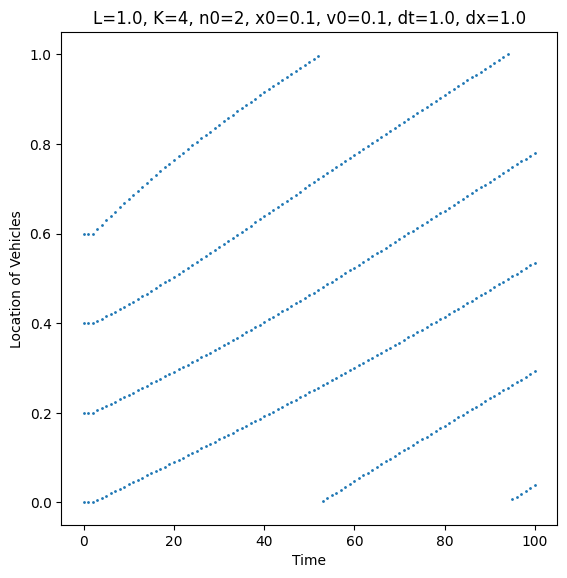

In [4]:
model = ds2s_OV.ds2s_OV(
	L=1.0,
	K=4,
	n_0=2,
	x_0=0.1,
	v_0=0.1,
	dt=1.0,
	dx=1.0,
	x_init=np.array([0.0, 0.2, 0.4, 0.6]),
	n_max=1000,
)
model.simulate()
plot_pattern(model, 0, 100)

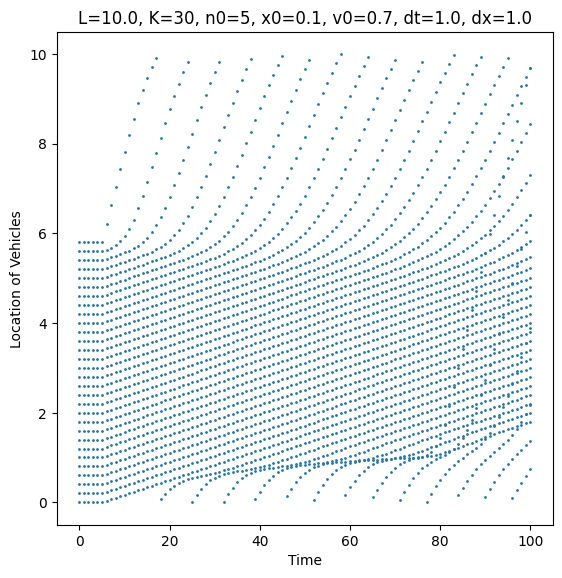

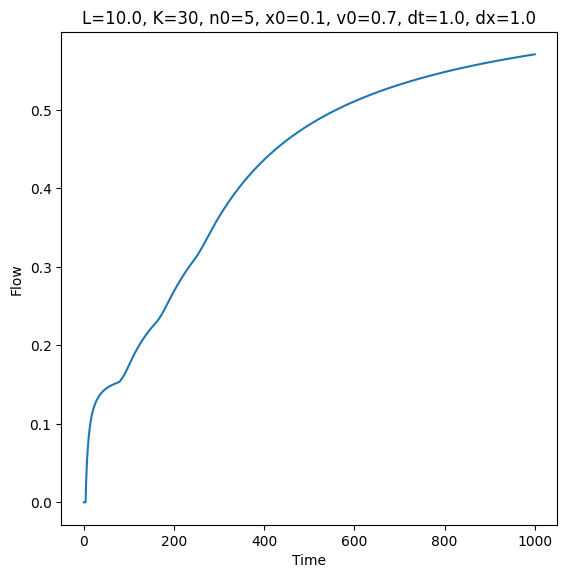

In [5]:
model = ds2s_OV.ds2s_OV(
	L=10.0,
	K=30,
	n_0=5,
	x_0=0.1,
	v_0=0.7,
	dt=1.0,
	dx=1.0,
	x_init=np.array([(2.0 * i) / 10 for i in range(30)]),
	n_max=1200,
)
model.simulate()
plot_pattern(model, 0, 100)
plot_flow(model=model, ni=0, nf=1000)

In [6]:
class ds2s_OV_x0(ds2s_OV.ds2s_OV):
	def _next(self):
		self.x[self.n+1] = self.x[self.n] + np.where(
			self._delta() <= self.delta_x[self.n] - self.x_0,
			self._delta(),
			self.delta_x[self.n] - self.x_0
		)
		self._periodic()
		self._update_delta_x(self.n+1)
		self.n += 1

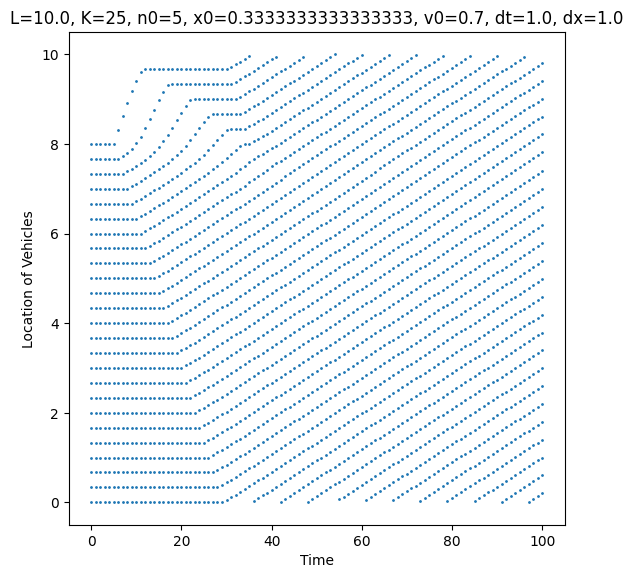

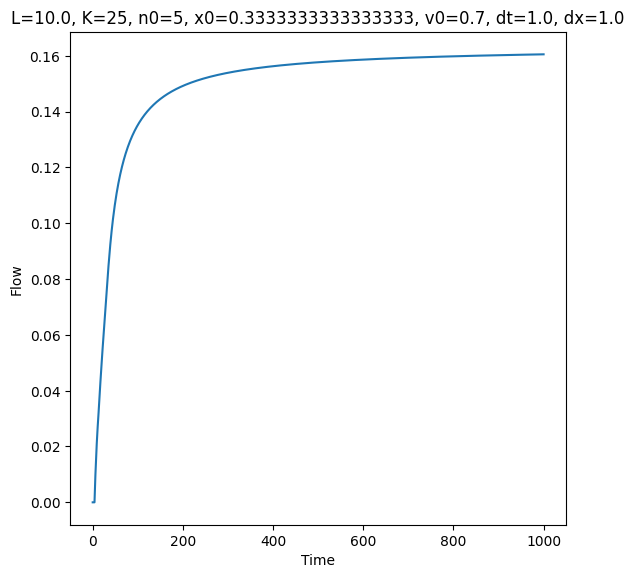

In [7]:
model = ds2s_OV_x0(
	L=10.0,
	K=25,
	n_0=5,
	x_0=10.0/30.0,
	v_0=0.7,
	dt=1.0,
	dx=1.0,
	x_init=np.array([10.0/30.0 * i for i in range(25)]),
	n_max=1200,
)
model.simulate()
plot_pattern(model, 0, 100)
plot_flow(model=model, ni=0, nf=1000)

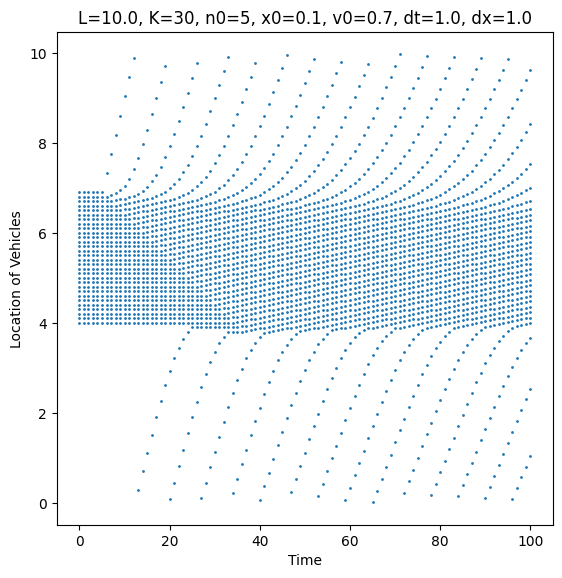

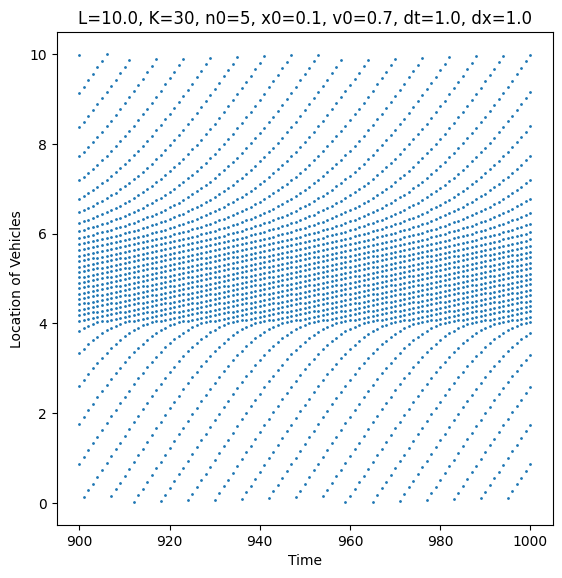

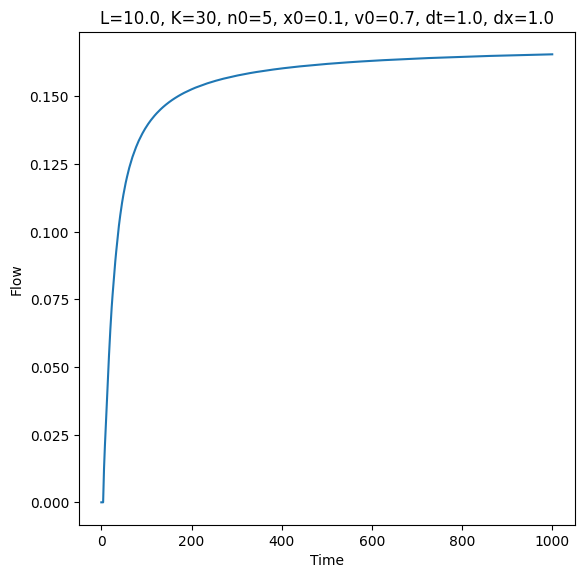

In [8]:
model = ds2s_OV_x0(
	L=10.0,
	K=30,
	n_0=5,
	x_0=0.1,
	v_0=0.7,
	dt=1.0,
	dx=1.0,
	x_init=np.array([4.0 + 0.1 * i for i in range(30)]),
	n_max=10000,
)
model.simulate()
plot_pattern(model, 0, 100)
plot_pattern(model, 900, 1000)
plot_flow(model=model, ni=0, nf=1000)

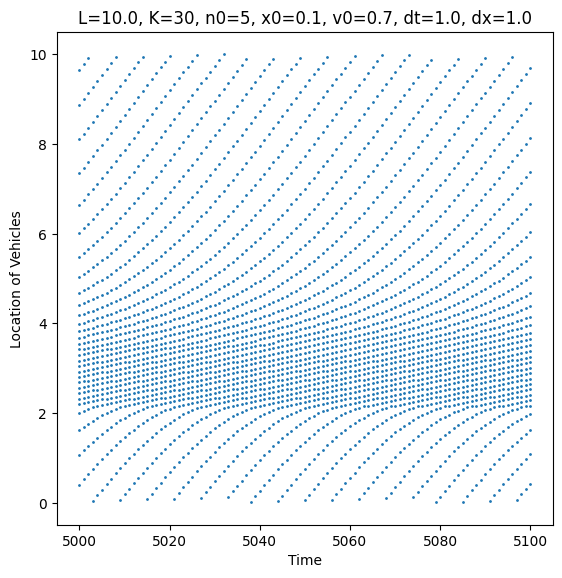

In [9]:
plot_pattern(model, 5000, 5100)

In [ ]:
model = ds2s_OV_x0(
	L=10.0,
	K=60,
	n_0=5,
	x_0=0.1,
	v_0=0.7,
	dt=1.0,
	dx=1.0,
	x_init=np.array(
		[0.1 * i for i in range(30)]
		+ [5.0 + 0.1 * i for i in range(30)]
	),
	n_max=10000,
)
model.simulate()
plot_pattern(model, 0, 100)
plot_pattern(model, 900, 1000)
plot_flow(model=model, ni=0, nf=9000)

In [ ]:
# ランダム
density = []
flow = []
for K in range(101):
	x_init = np.array(sorted(random.sample([0.1 * i for i in range(100)], K)))
	model = ds2s_OV_x0(
		L=10.0,
		K=K,
		n_0=5,
		x_0=0.1,
		v_0=0.7,
		dt=1.0,
		dx=1.0,
		x_init=x_init,
		n_max=1010
	)
	model.simulate()
	density.append(model.density())
	flow.append(model.flow(800, 1000))
	plot_pattern(model, 0, 100)

In [ ]:
# 均等に並べる
density = []
flow = []
for K in range(101):
	x_init = np.array([10.0 / K * i for i in range(K)])
	model = ds2s_OV_x0(
		L=10.0,
		K=K,
		n_0=5,
		x_0=0.1,
		v_0=0.7,
		dt=1.0,
		dx=1.0,
		x_init=x_init,
		n_max=1010
	)
	model.simulate()
	density.append(model.density())
	flow.append(model.flow(800, 1000))
	plot_pattern(model, 0, 100)

In [ ]:
# 渋滞を作る
for K in range(101):
	x_init = np.array([0.1 * i for i in range(K)])
	model = ds2s_OV_x0(
		L=10.0,
		K=K,
		n_0=5,
		x_0=0.1,
		v_0=0.7,
		dt=1.0,
		dx=1.0,
		x_init=x_init,
		n_max=1010
	)
	model.simulate()
	plot_pattern(model, 900, 1000)

In [ ]:
# 渋滞を二つ作る
for K in range(101):
	x_init = np.array(
		[0.1 * i for i in range(K - K // 2)]
		+ [5.0 + 0.1 * i for i in range(K // 2)]
	)
	model = ds2s_OV_x0(
		L=10.0,
		K=K,
		n_0=5,
		x_0=0.1,
		v_0=0.7,
		dt=1.0,
		dx=1.0,
		x_init=x_init,
		n_max=1010
	)
	model.simulate()
	plot_pattern(model, 0, 100)